# Testing phase maps 
#### The inputs to test the CNN model
Each of size 129x6 (frequency bins x number of microphones)

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import random
from scipy.io import wavfile

In [2]:
'''
    part1 : Pre-processing the data 
'''

#load the data 
test_data = np.load('../test_loader_8class.npy')

#speech signal resampled from CMU-ARCTIC database 
f, speech = wavfile.read("../8000.wav")

fs = 8000      #samples/second
T_ = 6          #length of signal in time domain 
N = int(T_*fs) #number of samples of the signal 
speech = speech[0:N] #6s speech

mean = 0
std = 1 


obs_len = N + test_data.shape[1] -1  #length of the convolution

processed = np.zeros((test_data.shape[0],129,406)) #

SNR_list = [10, 20]


for j in range(test_data.shape[0]):
    
    yt = np.zeros((obs_len, )) 
    yt += np.convolve(speech, test_data[j,:])
    
    # Generate additive gaussian noise at SNR between 10 and 20   
    SNR = random.choice(SNR_list)
    sig_norm = np.linalg.norm(yt)
    noise_t = np.random.randn(obs_len, ) #additive gaussian noise
    noise_norm = sig_norm/(10.**(SNR/20.))
    noise_t = noise_norm*noise_t/np.linalg.norm(noise_t)
    
    yt += noise_t #noisy signal

    f, t, Zxx = signal.stft(yt, fs, nperseg=256)
    # store the phase of the processed STFT
    processed[j,:,:] = np.angle(Zxx)
    if(j%100==0):
        percentage = (j/test_data.shape[0])*100
        print('data processed = {:0.2f}%'.format(percentage))
        
print('data processed = 100%\n')
print('Finished processing')

data processed = 0.00%
data processed = 100%

Finished processing


In [3]:
'''
    Part2 : reshaping the data structure for testing the model
'''

n_mics = 6
size1 = int(processed.shape[0]/n_mics)
x_ = np.zeros((size1,129,6,406))

for i in range(size1):
    
    mic0 = processed[6*i + 0,:,:]
    mic1 = processed[6*i + 1,:,:]
    mic2 = processed[6*i + 2,:,:]
    mic3 = processed[6*i + 3,:,:]
    mic4 = processed[6*i + 4,:,:]
    mic5 = processed[6*i + 5,:,:]
    x = np.zeros((129,6,1))
    for j in range(406):
        x0 = np.vstack((mic0[:,j],mic1[:,j],mic2[:,j],mic3[:,j],mic4[:,j], mic5[:,j])).T
        x = np.concatenate((x,x0[:,:,None]),axis=2)
    
    x = x[:,:,1:x.shape[2]]
    x_ [i,:,:,:]= x
    if(i%2==0):
        percentage = (i/size1)*100
        print('percentage of 1st data reshaped = {:0.2f}%'.format(percentage))

print('percentage of 1st data reshaped = 100%\n')
print('Finished 1st reshaping')

size2 = int(x_.shape[0]*x_.shape[3])
x2 = np.zeros((size2,129,6))

for i in range(size1):
    for j in range(406):
        x2[406*i+j,:,:] = x_[i,:,:,j] 
    if(i%10==0):
        percentage = (i/size1)*100
        print('percentage of 2nd data reshaped = {:0.2f}%'.format(percentage))
        
print('percentage of 2nd data reshaped = 100%\n')
print('Finished 2nd reshaping')

percentage of 1st data reshaped = 0.00%
percentage of 1st data reshaped = 12.50%
percentage of 1st data reshaped = 25.00%
percentage of 1st data reshaped = 37.50%
percentage of 1st data reshaped = 50.00%
percentage of 1st data reshaped = 62.50%
percentage of 1st data reshaped = 75.00%
percentage of 1st data reshaped = 87.50%
percentage of 1st data reshaped = 100%

Finished 1st reshaping
percentage of 2nd data reshaped = 0.00%
percentage of 2nd data reshaped = 62.50%
percentage of 2nd data reshaped = 100%

Finished 2nd reshaping


#### 8 class here because we worked with the test_loader_8class

In [ ]:
np.save('test_data_8class_speech',x2)

### Example : plot of phase of the STFT of a signal 
NB: Its not the phase map 

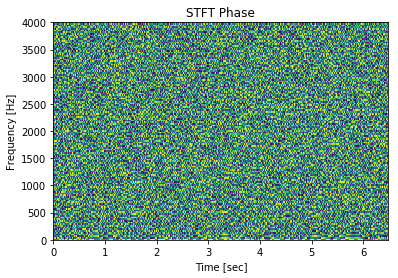

In [4]:
plt.pcolormesh(t, f, processed[45,:,:])
plt.title('STFT Phase')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### Example : plot of phase map
NB: The input to the model

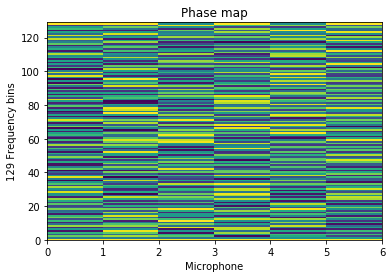

In [5]:
t2 = np.array([0,1,2,3,4,5,6])
f2 = np.arange(130)
plt.pcolormesh(t2, f2, x2[45,:,:])
plt.title('Phase map')
plt.ylabel('129 Frequency bins')
plt.xlabel('Microphone')
plt.show()